In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\emili\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_US = df[df['job_country'] == 'United States']

In [5]:
df_skills = df_US.explode('job_skills')   # Explodimos a lista de skills de uma pessoa em uma entrada de skill por pessoa

In [8]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()   # it is a series.

# To transform  em df

df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending = False, inplace = True)

In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

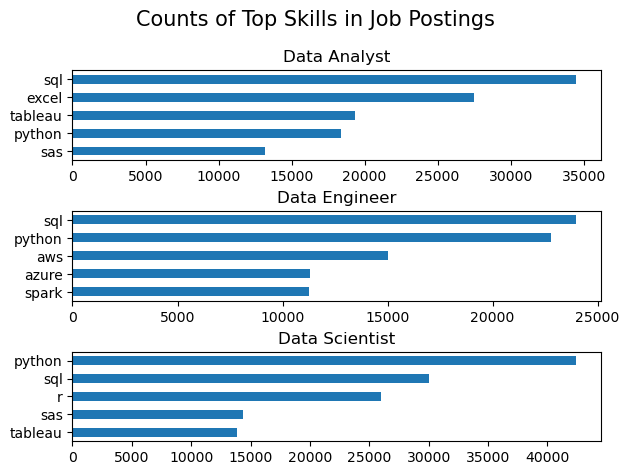

In [18]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)  # fix the overlap
plt.show()

In [21]:
# Para fazer o percentual

df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')  # Ultima funcao eh para criar uma df

In [ ]:
# Agora precisa incluir essa coluna de total no df 

df_skills_perc = pd.merge(df_skills_count,df_job_title_count,how='left', on = 'job_title_short')

df_skills_perc['skill_percent'] = 100 * (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'])

df_skills_perc

In [ ]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x = 'job_skills', y = 'skill_percent', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

ax[0].set_xlim(ax[2].get_xlim())
ax[1].set_xlim(ax[2].get_xlim())

fig.suptitle('Percent of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)  # fix the overlap
plt.show()

In [25]:
# Vamos melhorar o layout dos graficos
import seaborn as sns   # importa o package seaborn

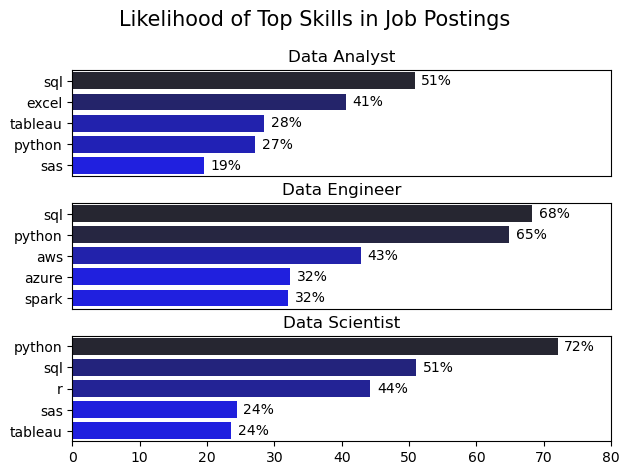

In [42]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x = 'skill_percent', y = 'job_skills', ax = ax[i], hue = 'skill_count', palette = 'dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,80)
    
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center') 

    # ax[i].set_xticks([])   # Tira o eixo x de todos os graficos
    # Mas se quiser manter o eixo x do ultimo grafico apenas

    if i != len(job_titles) - 1:
        ax[i].set_xticks([]) 

fig.suptitle('Likelihood of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)  # fix the overlap
plt.show()